# EDA

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import seaborn as sns


pd.set_option('display.max_columns', 500)
sns.set(rc={'figure.figsize':(12.7,9.27)})

# Leitura do Dataset:

In [2]:
df_ind = pd.read_csv('./dados/individuos_espec.csv', sep=';')
df_ind.name = df_ind.name.astype('str')
df_ind.estuda = df_ind.estuda.astype('str')
df_ind.estado_civil = df_ind.estado_civil.astype('str')
df_ind.trabalha = df_ind.trabalha.astype('str')
df_ind.pratica_esportes = df_ind.pratica_esportes.astype('str')

df_ind.head()

name  idade estado_civil  qt_filhos estuda trabalha pratica_esportes  \
0    1   44.0   divorciado        1.0    1.0      0.0              1.0   
1    2   24.0       casado        0.0    0.0      0.0              1.0   
2    3   35.0     solteiro        1.0    0.0      0.0              1.0   
3    4   50.0       casado        1.0    1.0      1.0              0.0   
4    5   30.0     solteiro        2.0    1.0      0.0              1.0   

  transporte_mais_utilizado        IMC  
0                   publico  22.200956  
1                   publico  25.378720  
2                particular  19.952393  
3                   publico  26.732053  
4                   publico  15.295668

In [3]:
df_conex = pd.read_csv('./dados/conexoes_espec.csv', sep=';')
df_conex.V1 = df_conex.V1.astype('str')
df_conex.V2 = df_conex.V2.astype('str')
df_conex.head()

V1 V2      grau       proximidade  prob_V1_V2
0  1  2  trabalho  visita_frequente    0.589462
1  1  3  trabalho       visita_rara    0.708465
2  2  4  trabalho     visita_casual         NaN
3  2  5  trabalho       visita_rara    0.638842
4  3  6    amigos        mora_junto         NaN

## Como está a distribuição de transmissão?

/media/joao/f03b3c1c-b8a0-4168-8dbb-123bf880b803/joao/Projetos/teste_neoway/neoway/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prob_V1_V2', ylabel='Density'>

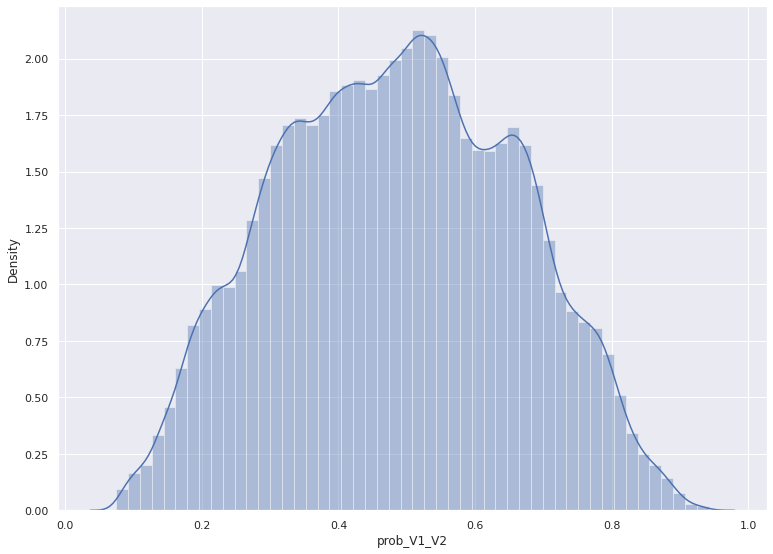

In [23]:
sns.distplot(df_conex.prob_V1_V2)

* Para nossa sorte a prob_V1_V2 obedece uma distribuição normal quase perfeita com skewness de 0.01.

## Junção dos 2 datasets:

In [4]:
df_mix = df_conex.merge(df_ind, left_on='V1', right_on='name', suffixes=('_v1', None), how='inner')
df_mix = df_mix.merge(df_ind, left_on='V2', right_on='name', suffixes=('_v1', '_v2'), how='inner')

In [5]:
#Lidando com features categoricas
df_mix.estuda_v1 = df_mix.estuda_v1.astype('str')
df_mix.estuda_v2 = df_mix.estuda_v2.astype('str')
df_mix.trabalha_v1 = df_mix.trabalha_v1.astype('str')
df_mix.trabalha_v2 = df_mix.trabalha_v2.astype('str')
df_mix.pratica_esportes_v1 = df_mix.pratica_esportes_v1.astype('str')
df_mix.pratica_esportes_v2 = df_mix.pratica_esportes_v2.astype('str')

df_mix

V1       V2      grau       proximidade  prob_V1_V2 name_v1  \
0            1        2  trabalho  visita_frequente    0.589462       1   
1            1        3  trabalho       visita_rara    0.708465       1   
2            2        4  trabalho     visita_casual         NaN       2   
3            2        5  trabalho       visita_rara    0.638842       2   
4            3        6    amigos        mora_junto         NaN       3   
...        ...      ...       ...               ...         ...     ...   
999994  499998   999996  trabalho       visita_rara         NaN  499998   
999995  499998   999997  trabalho       visita_rara         NaN  499998   
999996  499999   999998   familia     visita_casual    0.451662  499999   
999997  499999   999999   familia       visita_rara    0.186973  499999   
999998  500000  1000000   familia       visita_rara         NaN  500000   

        idade_v1 estado_civil_v1  qt_filhos_v1 estuda_v1 trabalha_v1  \
0           44.0      divorciado           1.0       1.0         0.0   
1           44.0      divorciado           1.0       1.0         0.0   
2           24.0          casado           0.0       0.0         0.0   
3           24.0          casado           0.0       0.0         0.0   
4           35.0        solteiro           1.0       0.0         0.0   
...          ...             ...           ...       ...         ...   
999994      23.0          casado           0.0       1.0         1.0   
999995      23.0          casado           0.0       1.0         1.0   
999996      26.0          casado           3.0       0.0         0.0   
999997      26.0          casado           3.0       0.0         0.0   
999998      12.0        solteiro           0.0       1.0         0.0   

       pratica_esportes_v1 transporte_mais_utilizado_v1     IMC_v1  name_v2  \
0                      1.0                      publico  22.200956        2   
1                      1.0                      publico  22.200956        3   
2                      1.0                      publico  25.378720        4   
3                      1.0                      publico  25.378720        5   
4                      1.0                   particular  19.952393        6   
...                    ...                          ...        ...      ...   
999994                 0.0                      publico  22.036885   999996   
999995                 0.0                      publico  22.036885   999997   
999996                 0.0                         taxi  19.543889   999998   
999997                 0.0                         taxi  19.543889   999999   
999998                 1.0                      publico  19.321093  1000000   

        idade_v2 estado_civil_v2  qt_filhos_v2 estuda_v2 trabalha_v2  \
0           24.0          casado           0.0       0.0         0.0   
1           35.0        solteiro           1.0       0.0         0.0   
2           50.0          casado           1.0       1.0         1.0   
3           30.0        solteiro           2.0       1.0         0.0   
4           20.0             nan           1.0       0.0         1.0   
...          ...             ...           ...       ...         ...   
999994      34.0          casado           1.0       0.0         1.0   
999995      40.0          casado           1.0       0.0         1.0   
999996      30.0      divorciado           1.0       0.0         0.0   
999997      33.0          casado           0.0       1.0         1.0   
999998      22.0        solteiro           0.0       0.0         0.0   

       pratica_esportes_v2 transporte_mais_utilizado_v2     IMC_v2  
0                      1.0                      publico  25.378720  
1                      1.0                   particular  19.952393  
2                      0.0                      publico  26.732053  
3                      1.0                      publico  15.295668  
4                      0.0                      publico  20.412942  
...               

## Análise de quem apenas foi contaminado:

* Análise de quem não tem entrada de contaminação no dataset, ou seja, os V2 que não contaminaram ninguém.

In [15]:
no_transmission = df_mix.loc[~df_mix.V2.isin(df_mix.V1.values)]

In [16]:
pf_conex = ProfileReport(no_transmission, minimal=True)
pf_conex

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Pode-se observar que as distribuições deste subset é praticamente igual as do dataset principal.

## Correlação de Features:
* Vou utilizar a correlação de PhiK para correlacionar features categóricas e numéricas;
* Vou substituir valores NaN por 'Não informado' em features categóricas e média para features numéricas;

In [22]:
# Valores retirados de profiling
mean_age = 30
mean_filhos = 0.92
mean_IMC = 22.47
cat = 'Não informado'

In [18]:
df_mix.idade_v1 = df_mix.idade_v1.fillna(mean_age)
df_mix.idade_v2 = df_mix.idade_v2.fillna(mean_age)
df_mix.estado_civil_v1 = df_mix.estado_civil_v1.fillna(cat)
df_mix.estado_civil_v2 = df_mix.estado_civil_v2.fillna(cat)
df_mix.qt_filhos_v1 = df_mix.qt_filhos_v1.fillna(mean_filhos)
df_mix.qt_filhos_v2 = df_mix.qt_filhos_v2.fillna(mean_filhos)
df_mix.estuda_v1 = df_mix.estuda_v1.fillna(cat)
df_mix.estuda_v2 = df_mix.estuda_v2.fillna(cat)
df_mix.trabalha_v1 = df_mix.trabalha_v1.fillna(cat)
df_mix.trabalha_v2 = df_mix.trabalha_v2.fillna(cat)
df_mix.pratica_esportes_v1 = df_mix.pratica_esportes_v1.fillna(cat)
df_mix.pratica_esportes_v2 = df_mix.pratica_esportes_v2.fillna(cat)
df_mix.transporte_mais_utilizado_v1 = df_mix.transporte_mais_utilizado_v1.fillna(cat)
df_mix.transporte_mais_utilizado_v2 = df_mix.transporte_mais_utilizado_v2.fillna(cat)
df_mix.IMC_v1 = df_mix.IMC_v1.fillna(mean_IMC)
df_mix.IMC_v2 = df_mix.IMC_v2.fillna(mean_IMC)

interval columns not set, guessing: ['prob_V1_V2', 'idade_v1', 'qt_filhos_v1', 'IMC_v1']


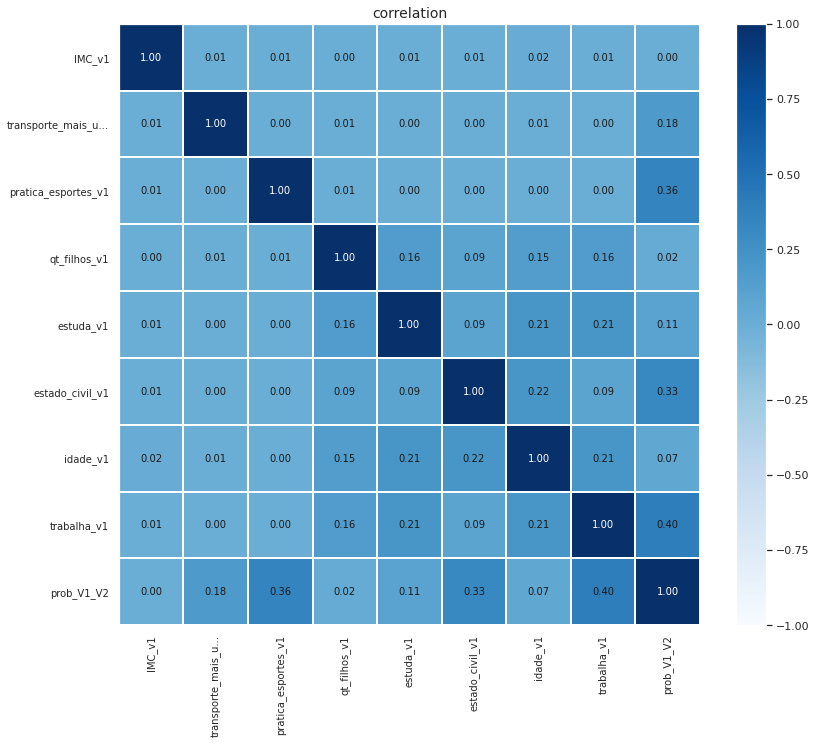

In [19]:
cols = ['prob_V1_V2', 'trabalha_v1','idade_v1', 'estado_civil_v1','estuda_v1','qt_filhos_v1','pratica_esportes_v1','transporte_mais_utilizado_v1','IMC_v1']
tst = df_mix[cols].phik_matrix()
plot_correlation_matrix(tst.values, x_labels=tst.columns, y_labels=tst.index, color_map='Blues',figsize=(12,10.5))

interval columns not set, guessing: ['prob_V1_V2', 'idade_v2', 'qt_filhos_v2', 'IMC_v2']


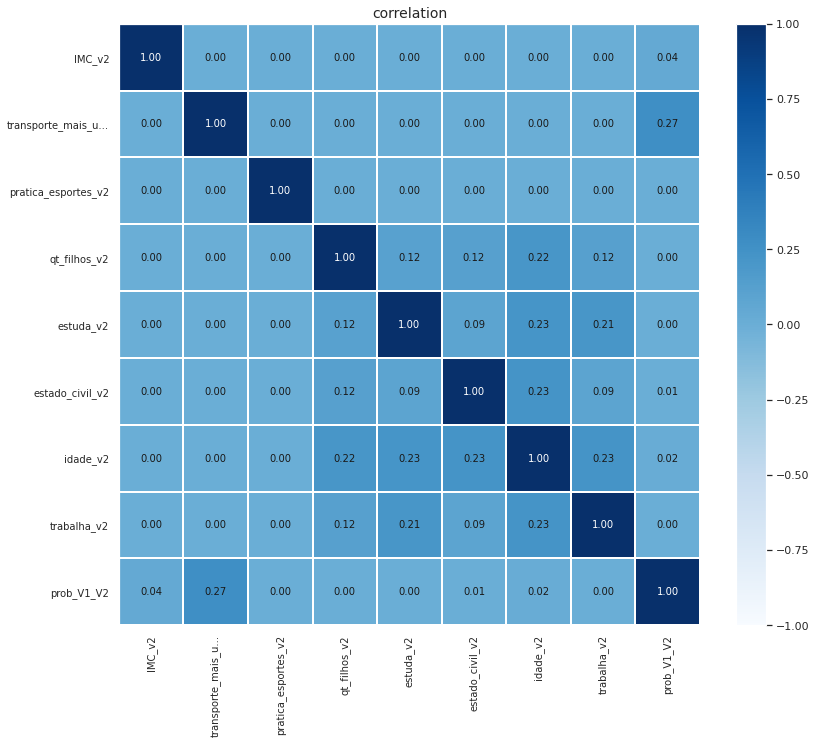

In [20]:
cols = ['prob_V1_V2', 'trabalha_v2','idade_v2', 'estado_civil_v2','estuda_v2','qt_filhos_v2','pratica_esportes_v2','transporte_mais_utilizado_v2','IMC_v2']
tst = df_mix[cols].phik_matrix()
plot_correlation_matrix(tst.values, x_labels=tst.columns, y_labels=tst.index, color_map='Blues',figsize=(12,10.5))

* Podemos observar que as features que mais impactam na taxa de transmissão é a de quem "carrega" o vírus;
* As features de quem é contaminado não impactam em quase nada na taxa. Porém, a feature **transporte_mais_utilizado** tem alta correlação, indicando que talvez os principais locais de contaminação sejam no transporte público, já que é o meio de transporte mais utilizado pela população.